In [1]:
from PIL import Image
import numpy as np
import skimage
import skimage.io
import skimage.feature
from skimage.feature import greycoprops
from skimage.transform import resize
import math
import statistics
import scipy
import scipy.stats
from scipy.stats import skew
from decimal import Decimal
from PIL import Image 
from scipy import misc
from numpy import genfromtxt
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
train_feature = []
train_label = []
test_feature = []
test_label = []

In [3]:
root_train = 'C:/Kuliah/Semester VII/Tes Dataset/chest_xray/chest_xray/train'
root_test = 'C:/Kuliah/Semester VII/Tes Dataset/chest_xray/chest_xray/test'

In [6]:
def train(parent):
    print("Training started!")

    folder_index = 0
    image_index = 0
    image_total = 0

    feature = []
    label = []
    index = 0
    label_feature =[]

    for folder in os.listdir(parent):
        current_path = "".join((parent, "/", folder))

        print("Extracting Feature from", folder)

        for file in os.listdir(current_path):
            path = (current_path + "/" + file)

            img = skimage.io.imread(path, as_gray=True)
            img = resize(img,(300,300))
            #if index == 0:
                #plt.imshow(img_pneumoniaresize)
            img = skimage.img_as_ubyte(img)
            img = np.asarray(img, dtype="int32")
            
            g = skimage.feature.greycomatrix(img, [1], [(3 * np.pi)/4], levels=img.max()+1, symmetric=False, normed=True)
            glcm_contrast = skimage.feature.greycoprops(g, 'contrast')[0][0]
            glcm_energy = skimage.feature.greycoprops(g, 'energy')[0][0]
            glcm_homogeneity = skimage.feature.greycoprops(g, 'homogeneity')[0][0]
            glcm_correlation = skimage.feature.greycoprops(g, 'correlation')[0][0]

            if not glcm_contrast is None or not glcm_energy is None or not glcm_homogeneity is None or not glcm_correlation is None:
                temp = [glcm_contrast, glcm_energy, glcm_homogeneity, glcm_correlation,index]
                # print(temp)
                train_feature.append(temp)
                train_label.append(index)
                
        np.savetxt("LVQ-GLCM-135_train_feature.csv", train_feature, delimiter=",")
        
        index = index + 1
    print("Training finish...")

In [7]:
def test(parent):
    print("Testing started!")
    folder_index = 0
    image_index = 0
    image_total = 0

    feature = []
    label = []
    index = 0

    for folder in os.listdir(parent):
        
        current_path = "".join((parent, "/", folder))

        print("Extracting Feature from", folder)

        for file in os.listdir(current_path):
            path = (current_path + "/" + file)

            img = skimage.io.imread(path, as_gray=True)
            img = resize(img,(300,300))
            img = skimage.img_as_ubyte(img)
            img = np.asarray(img, dtype="int32")

            g = skimage.feature.greycomatrix(img, [1], [(3 * np.pi)/4], levels=img.max()+1, symmetric=False, normed=True)
            glcm_contrast = skimage.feature.greycoprops(g, 'contrast')[0][0]
            glcm_energy = skimage.feature.greycoprops(g, 'energy')[0][0]
            glcm_homogeneity = skimage.feature.greycoprops(g, 'homogeneity')[0][0]
            glcm_correlation = skimage.feature.greycoprops(g, 'correlation')[0][0]

            if not glcm_contrast is None or not glcm_energy is None or not glcm_homogeneity is None or not glcm_correlation is None:
                temp = [glcm_contrast, glcm_energy, glcm_homogeneity, glcm_correlation,index]
                # print(temp)
                test_feature.append(temp)
                test_label.append(index)
        np.savetxt("LVQ-GLCM-135_test_feature.csv", test_feature, delimiter=",")
        index = index + 1
    print("Testing finish...")

In [8]:
def main():
     X_train = genfromtxt('C:\\Kuliah\\Semester VII\\Tes Dataset\\LVQ-GLCM-135_train_feature.csv', delimiter=',')
     X_train = np.nan_to_num(np.array(X_train))

     X_test = genfromtxt('C:\\Kuliah\\Semester VII\\Tes Dataset\\LVQ-GLCM-135_test_feature.csv', delimiter=',')
     X_test = np.nan_to_num(np.array(X_test))

train(root_train)
test(root_test)

X_train = np.nan_to_num(np.array(train_feature))
X_test = np.nan_to_num(np.array(test_feature))

print("\nTraining Features\n")
print("Training features with dimension:", X_train.shape)

print("\nTest Features\n")
print("Test features with dimension:", X_test.shape)
main()

Training started!
Extracting Feature from NORMAL
Extracting Feature from PNEUMONIA
Training finish...
Testing started!
Extracting Feature from NORMAL
Extracting Feature from PNEUMONIA
Testing finish...

Training Features

Training features with dimension: (1400, 5)

Test Features

Test features with dimension: (400, 5)


In [9]:
# LVQ
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [10]:
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

In [11]:
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [12]:
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

In [13]:
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

In [14]:
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [15]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		cm = confusion_matrix(actual, predicted)
		print(cm)
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

In [16]:
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [17]:
def get_best_matching_unit(codebooks, test_row):
	distances = list()
	for codebook in codebooks:
		dist = euclidean_distance(codebook, test_row)
		distances.append((codebook, dist))
	distances.sort(key=lambda tup: tup[1])
	return distances[0][0]

In [18]:
def predict(codebooks, test_row):
	bmu = get_best_matching_unit(codebooks, test_row)
	return bmu[-1]

In [19]:
def random_codebook(train):
	n_records = len(train)
	n_features = len(train[0])
	codebook = [train[randrange(n_records)][i] for i in range(n_features)]
	return codebook

In [20]:
def train_codebooks(train, n_codebooks, lrate, epochs):
	codebooks = [random_codebook(train) for i in range(n_codebooks)]
	for epoch in range(epochs):
		rate = lrate * (1.0-(epoch/float(epochs)))
		for row in train:
			bmu = get_best_matching_unit(codebooks, row)
			for i in range(len(row)-1):
				error = row[i] - bmu[i]
				if bmu[-1] == row[-1]:
					bmu[i] += rate * error
				else:
					bmu[i] -= rate * error
	return codebooks

In [21]:
def learning_vector_quantization(train, test, n_codebooks, lrate, epochs):
	codebooks = train_codebooks(train, n_codebooks, lrate, epochs)
	predictions = list()
	for row in test:
		output = predict(codebooks, row)
		predictions.append(output)
	return(predictions)

In [22]:
seed(1)

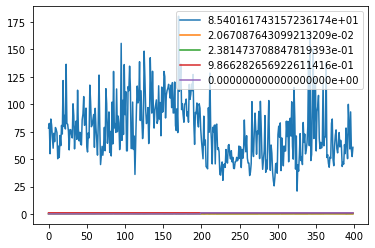

[[35  0]
 [45  0]]
[[36  0]
 [44  0]]
[[ 0 43]
 [ 0 37]]
[[40  0]
 [40  0]]
[[ 0 46]
 [ 0 34]]
Scores: [43.75, 45.0, 46.25, 50.0, 42.5]
Mean Accuracy: 45.500%


In [26]:
# load and prepare data
filename = 'LVQ-GLCM-135_test_feature.csv'
dataset = load_csv(filename)
# df = pd.read_csv('LVQ-GLCM-135_test_feature.csv')
# df.plot()
# plt.show()

for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
learn_rate = 0.4
n_epochs = 200
n_codebooks = 20
scores = evaluate_algorithm(dataset, learning_vector_quantization, n_folds, n_codebooks, learn_rate, n_epochs)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))